#### Random Sample Imputation

Aim: Random sample imputation consistis of taking random observation from the dataset and we use this observation to replace the NaN values.

When should it be used ? It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
df.Age.isnull().sum()

177

In [22]:
df.Age.dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [27]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the NaN
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##Pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [28]:
median =df.Age.median()

In [29]:
median

28.0

In [30]:
impute_nan(df,"Age",median)

In [31]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

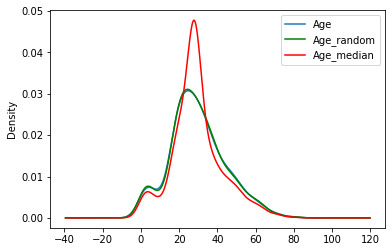

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

##### Advantages
1.Easy to implement <br>
2.There is less distortion in variance
##### Disadvantages
1.Every situation randomness wont work


#### Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [35]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [37]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [40]:
df.Age.median()

28.0

In [42]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [43]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


##### Advantages
1.Easy to implement<br>
2.Capture the importance of missing values

##### Disdvantages
1.Creating Additional Features (Curse of Dimensionality)

#### End of Distribution Imputation

In [46]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

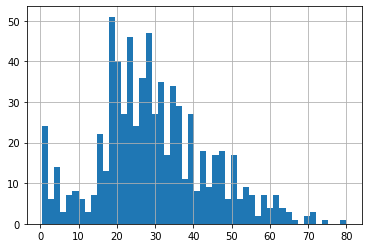

In [51]:
df.Age.hist(bins=50)

In [52]:
df.Age.mean()+3*df.Age.std()

73.27860964406095

<AxesSubplot:xlabel='Age'>

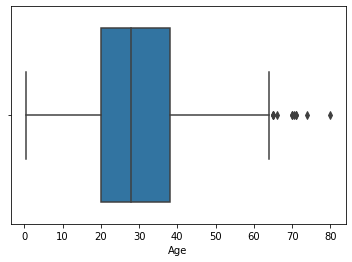

In [53]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [54]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [55]:
impute_nan(df,variable='Age',median=df.Age.median(),extreme=df.Age.mean()+3*df.Age.std())

In [56]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


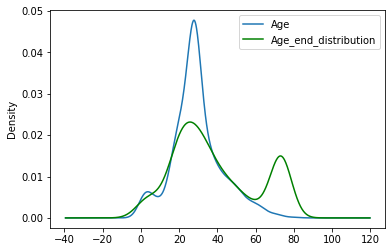

In [57]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_distribution.plot(kind='kde',ax=ax,color='green')
#df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<AxesSubplot:xlabel='Age_end_distribution'>

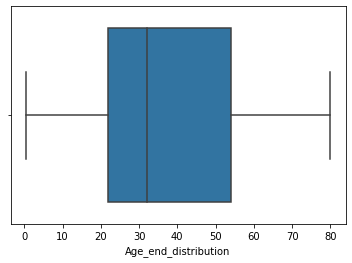

In [59]:
sns.boxplot('Age_end_distribution',data=df)

#### Advantages
<ul>
    <li>Easy to implement</li>
    <li>Captures the importance of missingness if there is one</li>
</ul>

#### Disadvantages
<ul>
    <li>Distorts the original distrbiution of the variable</li>
    <li>If missingness is not important,it may mask the predicitive power of the original variable by distorting its distribution</li>
    <li>If the number of NA is big,it will mask true outliers in the distribution</li>
    <li>If the number of NA is small,the replaced NA may be considered an outlier and pre processed in a subsequent feature engineering